## Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme() 
%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>

SINASC - Sistema de Informações de Nascidos Vivos

     
O DATASUS desenvolveu o Sistema de Informações sobre Nascidos Vivos (SINASC) visando reunir informações epidemiológicas referentes aos nascimentos informados em todo território nacional. Sua implantação ocorreu de forma lenta e gradual em todas as Unidades da Federação.     
     
http://www2.datasus.gov.br/DATASUS/index.php?area=060702


In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# 3.0 GroupBy: Dividir, Aplicar, Combinar (Split, Apply, Combine)



<img src="split-apply-combine.png" width="750" align="center">


https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html

#### Selecionando colunas

In [4]:
sinasc_1 = sinasc_raw[['ESCMAE', 'IDADEMAE','DTNASC']]
sinasc_1.head()

,ESCMAE,IDADEMAE,DTNASC
0,8 a 11 anos,19,2019-02-19
1,8 a 11 anos,29,2019-02-21
2,8 a 11 anos,37,2019-02-25
3,12 anos ou mais,30,2019-03-20
4,8 a 11 anos,30,2019-03-23


#### Cálculo da média geral

In [5]:
sinasc_1.mean()

C:\Users\yanks\AppData\Local\Temp\ipykernel_22628\635669246.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sinasc_1.mean()


IDADEMAE    26.093718
dtype: float64

#### Analisando o tempo de estudo por grupo

In [7]:
sinasc_1.ESCMAE.value_counts()

8 a 11 anos        15633
12 anos ou mais     5767
4 a 7 anos          4760
1 a 3 anos           516
Nenhuma               40
Name: ESCMAE, dtype: int64

# 4.0  Estrutura do Groupby 



#### Analisando a escolaridade da mãe

In [8]:
sinasc_1.groupby('ESCMAE')

#### Média da escolaridade da mãe por grupo

In [9]:
sinasc_1.groupby('ESCMAE').mean()

,IDADEMAE
ESCMAE,
1 a 3 anos,28.430233
12 anos ou mais,29.548119
4 a 7 anos,24.604412
8 a 11 anos,25.150387
Nenhuma,31.575000



``` python
df.groupby(by = None, axis = 0, level = None, as_index: bool = True,
           sort: bool = True, group_keys: bool = True,
           squeeze: bool = <object object at 0x00000225ADF7E510>,
           observed: bool = False, dropna: bool = True
) -> 'DataFrameGroupBy'

```

# 5.0 Pivot table

#### Pivot retorna um datarame

sinasc_3.pivot_table(values=None, index=None, columns=None, aggfunc='mean',
                    fill_value=None, margins=False, dropna=True, margins_name='All',
                    observed=False,
) -> 'DataFrame'

In [12]:
sinasc_1.pivot_table(index='ESCMAE',
                     aggfunc='mean')

,IDADEMAE
ESCMAE,
1 a 3 anos,28.430233
12 anos ou mais,29.548119
4 a 7 anos,24.604412
8 a 11 anos,25.150387
Nenhuma,31.575000


# 6.0 Group by DTNASC e contagem da IDADEMAE 

##  6.1 Em SQL <a name="sql"></a>

``` sql
SELECT DTNASC, count(IDADEMAE) 
FROM sinasc
GROUP BY DTNASC

```

## 6.2 Em excel <a name="excel"></a>

<img src="groupby_gif_2.gif" width="750" align="center">

## 6.3 Python com ``groupby()`` <a name="py_group"></a>

In [13]:
sinasc_1.groupby('DTNASC')['IDADEMAE'].count().to_frame()

,IDADEMAE
DTNASC,
2019-01-01,48
2019-01-02,68
2019-01-03,77
2019-01-04,73
2019-01-05,71
...,...
2019-12-27,84
2019-12-28,59
2019-12-29,48


## 6.4 Python com ``pivot_table()`` <a name="py_pivot"></a>

In [14]:
sinasc_1.pivot_table(values = 'IDADEMAE',index = 'DTNASC', aggfunc='count')

,IDADEMAE
DTNASC,
2019-01-01,48
2019-01-02,68
2019-01-03,77
2019-01-04,73
2019-01-05,71
...,...
2019-12-27,84
2019-12-28,59
2019-12-29,48


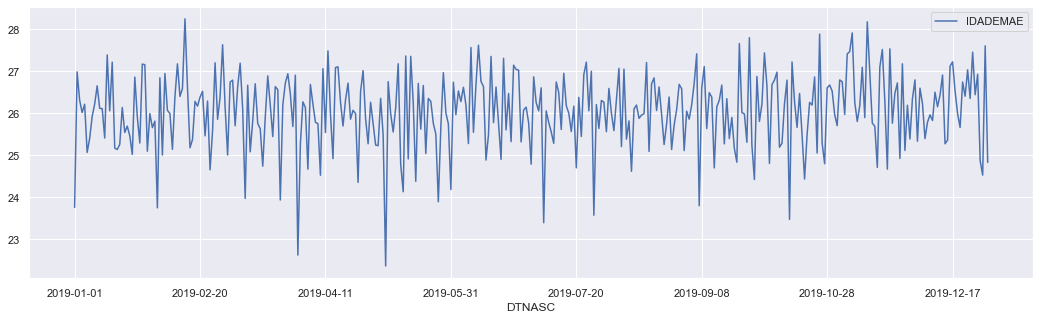

In [15]:
sinasc_1.pivot_table(values = 'IDADEMAE',index = 'DTNASC', aggfunc='mean').plot(figsize=[18,5]);